In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data_train_path = '/content/drive/MyDrive/Classroom/Fruits_Vegetables/train'
data_test_path = '/content/drive/MyDrive/Classroom/Fruits_Vegetables/test'
data__val = '/content/drive/MyDrive/Classroom/Fruits_Vegetables/validation'

In [ ]:
img_width = 180
img_height =180

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3151 files belonging to 36 classes.


In [ ]:
data_cat = data_train.class_names

In [ ]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
# data__val = '/content/drive/MyDrive/Classroom/Fruits_Vegetables/validation'
data_val = tf.keras.utils.image_dataset_from_directory(data__val,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [ ]:
# data_test_path = '/content/drive/MyDrive/Classroom/Fruits_Vegetables/test'
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


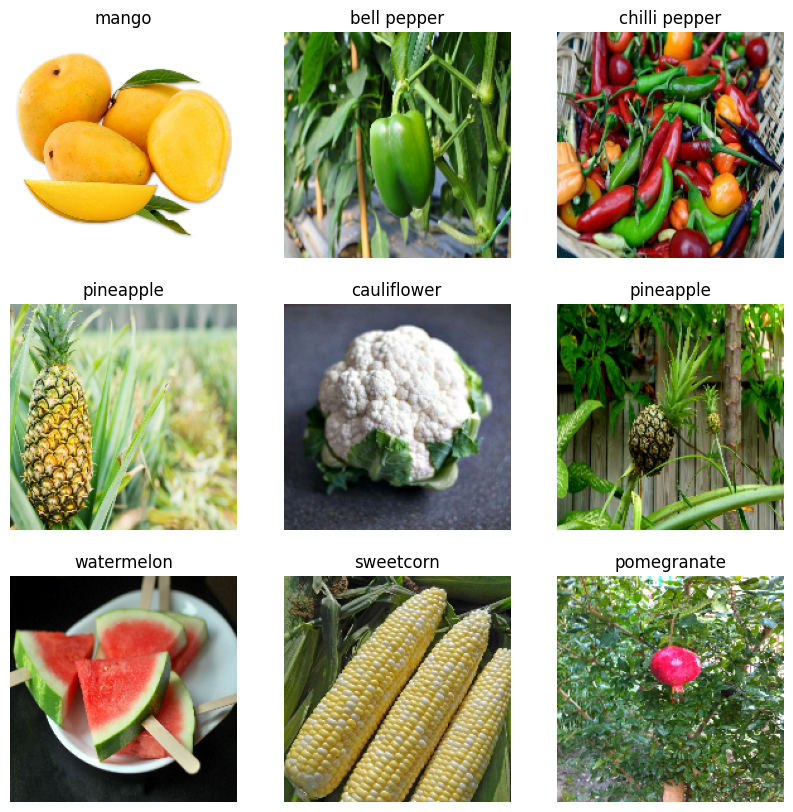

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size = 5
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/5
99/99 [==============================] - 463s 5s/step - loss: 3.0482 - accuracy: 0.1511 - val_loss: 2.1558 - val_accuracy: 0.4131
Epoch 2/5
99/99 [==============================] - 75s 692ms/step - loss: 2.2410 - accuracy: 0.3593 - val_loss: 1.5088 - val_accuracy: 0.6068
Epoch 3/5
99/99 [==============================] - 75s 704ms/step - loss: 1.7577 - accuracy: 0.4976 - val_loss: 0.8238 - val_accuracy: 0.8148
Epoch 4/5
99/99 [==============================] - 76s 711ms/step - loss: 1.2335 - accuracy: 0.6388 - val_loss: 0.5416 - val_accuracy: 0.8746
Epoch 5/5
99/99 [==============================] - 76s 705ms/step - loss: 0.7591 - accuracy: 0.7883 - val_loss: 0.4671 - val_accuracy: 0.8946


Text(0.5, 1.0, 'Loss')

<Figure size 1000x1000 with 0 Axes>

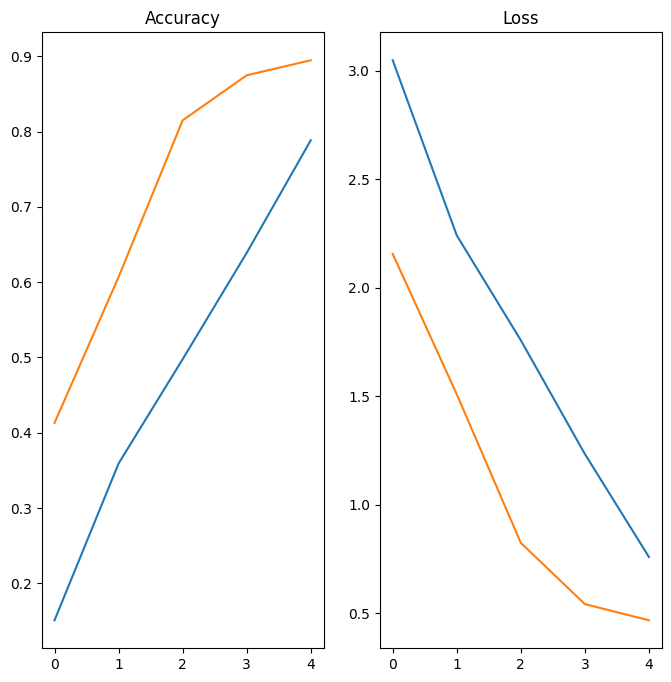

In [ ]:
epochs_size = 5
plt.figure(figsize=(10,10))
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [ ]:
image = '/content/cabbage.jpg'

image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [ ]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 306ms/step


In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is lettuce with accuracy of 88.01
